## Recover cosmology

Plot some chains attempting to recover cosmology from randomly selected simulations from the suite. See how these contours change with undersampling training points



In [1]:
import numpy as np
import emcee_sampler
from chainconsumer import ChainConsumer

In [2]:
## Check priors with new parametrisation
sampler_fid = emcee_sampler.EmceeSampler(read_chain_file=29)
sampler_wider_prior = emcee_sampler.EmceeSampler(read_chain_file=30)

 /home/chris/.local/lib/python3.5/site-packages/paramz/parameterized.py:61: RuntimeWarning:Don't forget to initialize by self.initialize_parameter()!


Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Chain shape is  (387000, 10)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Chain shape is  (467000, 10)


In [3]:
chain_fid,lnprob_fid=sampler_fid.get_chain(cube=False)
chain_prior,lnprob_prior=sampler_wider_prior.get_chain(cube=False)

 /usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:445: UserWarning:Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


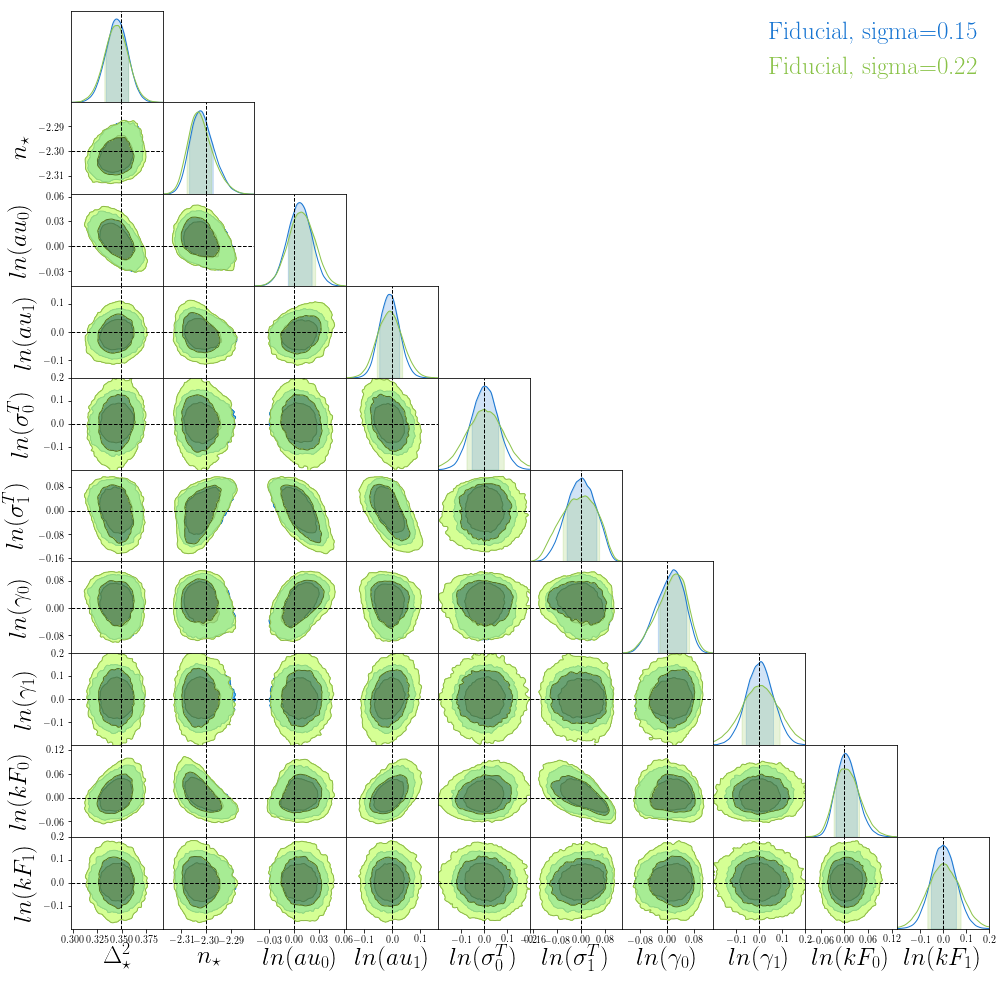

In [4]:
c=ChainConsumer()
c.add_chain(chain_fid,parameters=sampler_fid.paramstrings,name="Fiducial, sigma=0.15")
c.add_chain(chain_prior,parameters=sampler_wider_prior.paramstrings,name="Fiducial, sigma=0.22")
c.configure(diagonal_tick_labels=False, tick_font_size=10, label_font_size=25, max_ticks=4)
fig = c.plotter.plot(figsize=(15,15),truth=sampler_fid.truth)
fig.show()

### Recover cosmology from random simulations
The previous test was recovering the cosmology from the centre of the simulation-space Latin hypercube. This will be the most densely sampled part of parameter space, and one where we are also starting with the correct IGM history as in the mock simulation.

So next let's test whether we can recover the cosmology from a randomly selected simulation, using the IGM fiducial model from our central simulation.

We randomly select simulations 10,15 and 20 to perform this test

In [5]:
sampler_10 = emcee_sampler.EmceeSampler(read_chain_file=34)
sampler_15 = emcee_sampler.EmceeSampler(read_chain_file=31)
sampler_20 = emcee_sampler.EmceeSampler(read_chain_file=33)

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
 /home/chris/.local/lib/python3.5/site-packages/paramz/parameterized.py:61: RuntimeWarning:Don't forget to initialize by self.initialize_parameter()!


Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Chain shape is  (532000, 10)


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Chain shape is  (364500, 10)


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Chain shape is  (799500, 10)


In [6]:
chain_10,lnprob_10=sampler_10.get_chain(cube=False)
chain_15,lnprob_15=sampler_15.get_chain(cube=False)
chain_20,lnprob_20=sampler_20.get_chain(cube=False)

# WE SHOULD GET DELTA_STAR, N_STAR FROM GENIC / GADGET FILES
Likelihood pivot point is in km/s, while pivot point in simulations are (at least for now) in Mpc.
This mixing is bound to give us headaches.

In [7]:
## Get delta_star, n_star for each set of sims
delta_star_10,n_star_10=sampler_10.like.fit_cosmology_params()
delta_star_15,n_star_15=sampler_15.like.fit_cosmology_params()
delta_star_20,n_star_20=sampler_20.like.fit_cosmology_params()

 /usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:445: UserWarning:Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


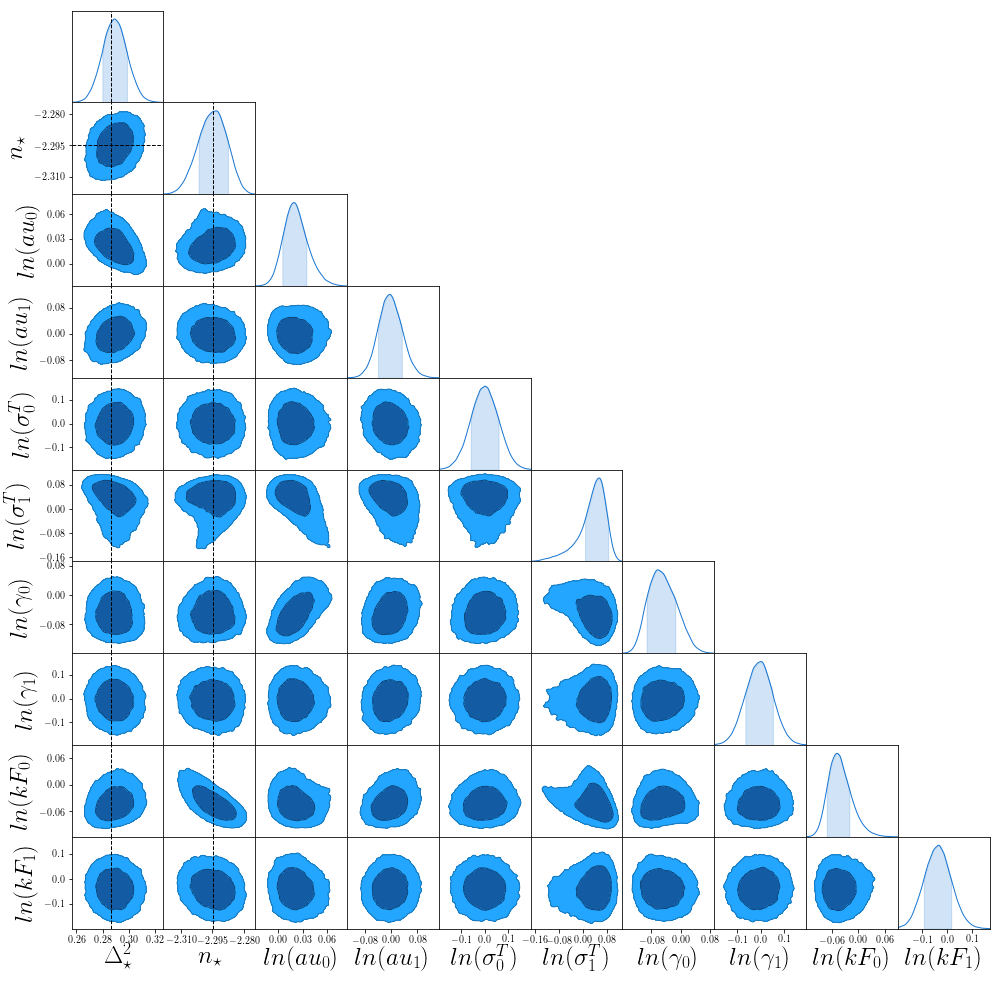

In [8]:
c=ChainConsumer()
c.add_chain(chain_10,parameters=sampler_10.paramstrings,name="Sim 10")
truth={sampler_10.paramstrings[0]:sampler_10.truth[0],sampler_10.paramstrings[1]:sampler_10.truth[1]}
c.configure(diagonal_tick_labels=False, tick_font_size=10, label_font_size=25, max_ticks=4)
fig = c.plotter.plot(figsize=(15,15),truth=truth)
fig.savefig("fig1.pdf")
fig.show()

 /usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:445: UserWarning:Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


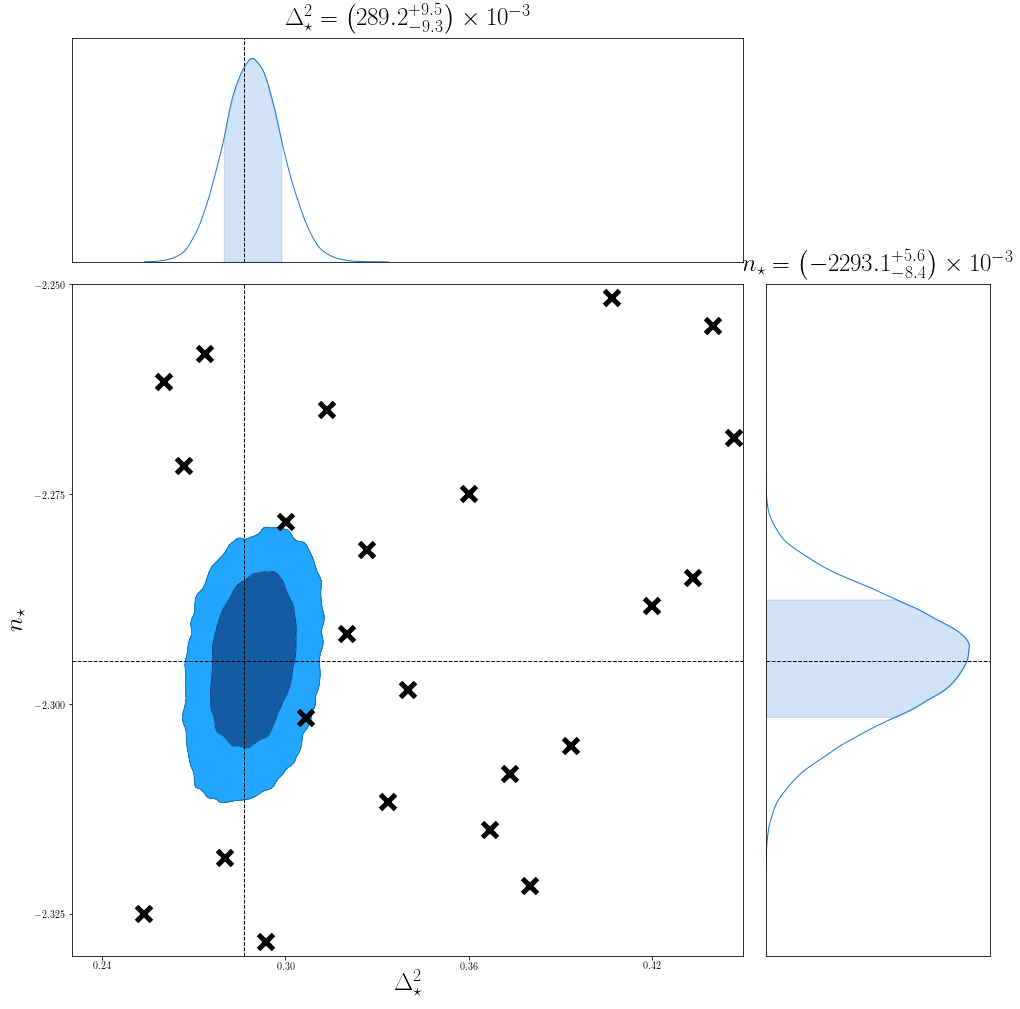

In [9]:
c=ChainConsumer()
c.add_chain(chain_10,parameters=sampler_10.paramstrings)
parameters = sampler_fid.paramstrings
c.configure(diagonal_tick_labels=False, tick_font_size=10, label_font_size=25, max_ticks=4)
fig = c.plotter.plot(figsize=(15,15),parameters=parameters[:2],truth=sampler_10.truth,extents={'$\\Delta^2_\\star$':(0.23,0.45),'$n_\\star$':(-2.33,-2.25)})
#fig.axes[2].plot(theta_alpha_05[0],theta_alpha_05[1],marker="x",color="red",ms=15,mew=5)  ## Refinement sim
for aa in range(len(delta_star_10)):
    fig.axes[2].plot(delta_star_10[aa],n_star_10[aa],marker="x",color="black",ms=15,mew=5)
#fig.savefig("prediction1.pdf")
fig.show()

 /usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:445: UserWarning:Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


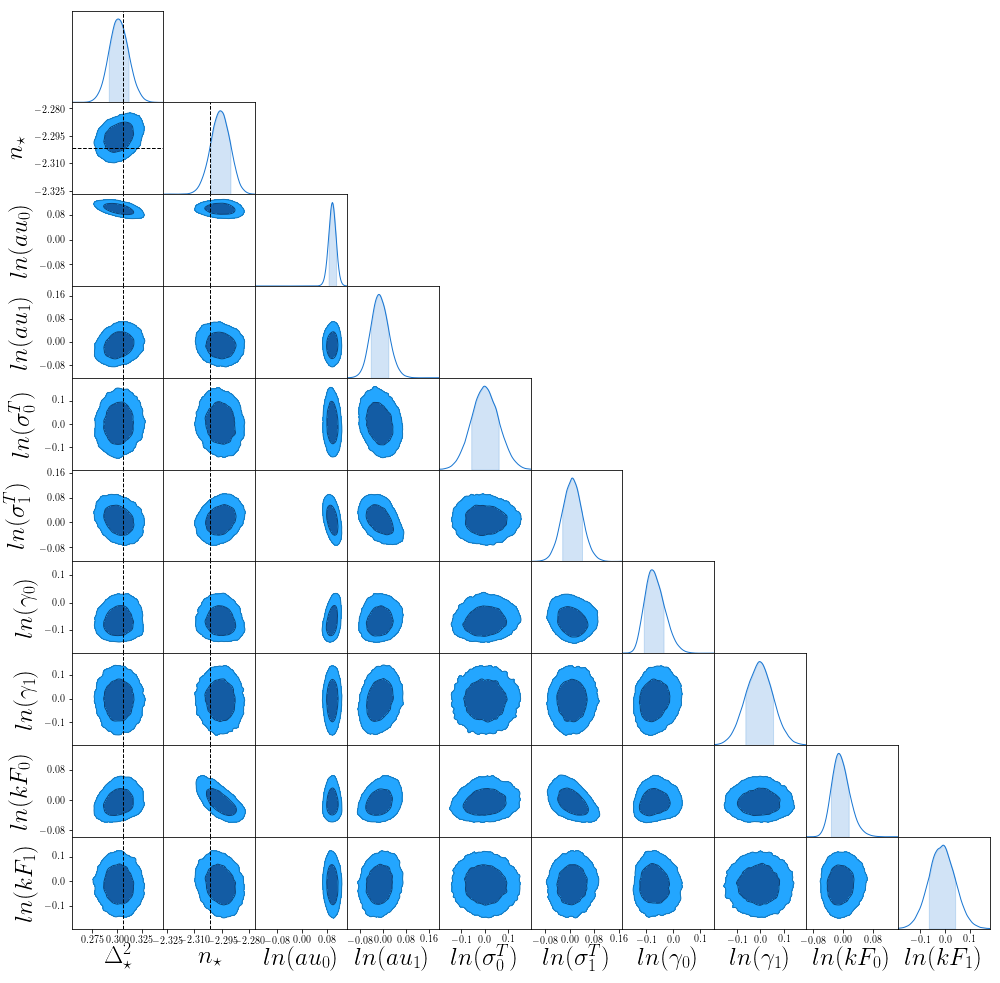

In [10]:
c=ChainConsumer()
c.add_chain(chain_15,parameters=sampler_15.paramstrings,name="Sim 15")
truth={sampler_15.paramstrings[0]:sampler_15.truth[0],sampler_15.paramstrings[1]:sampler_15.truth[1]}
c.configure(diagonal_tick_labels=False, tick_font_size=10, label_font_size=25, max_ticks=4)
fig = c.plotter.plot(figsize=(15,15),truth=truth)
fig.show()

 /usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:445: UserWarning:Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


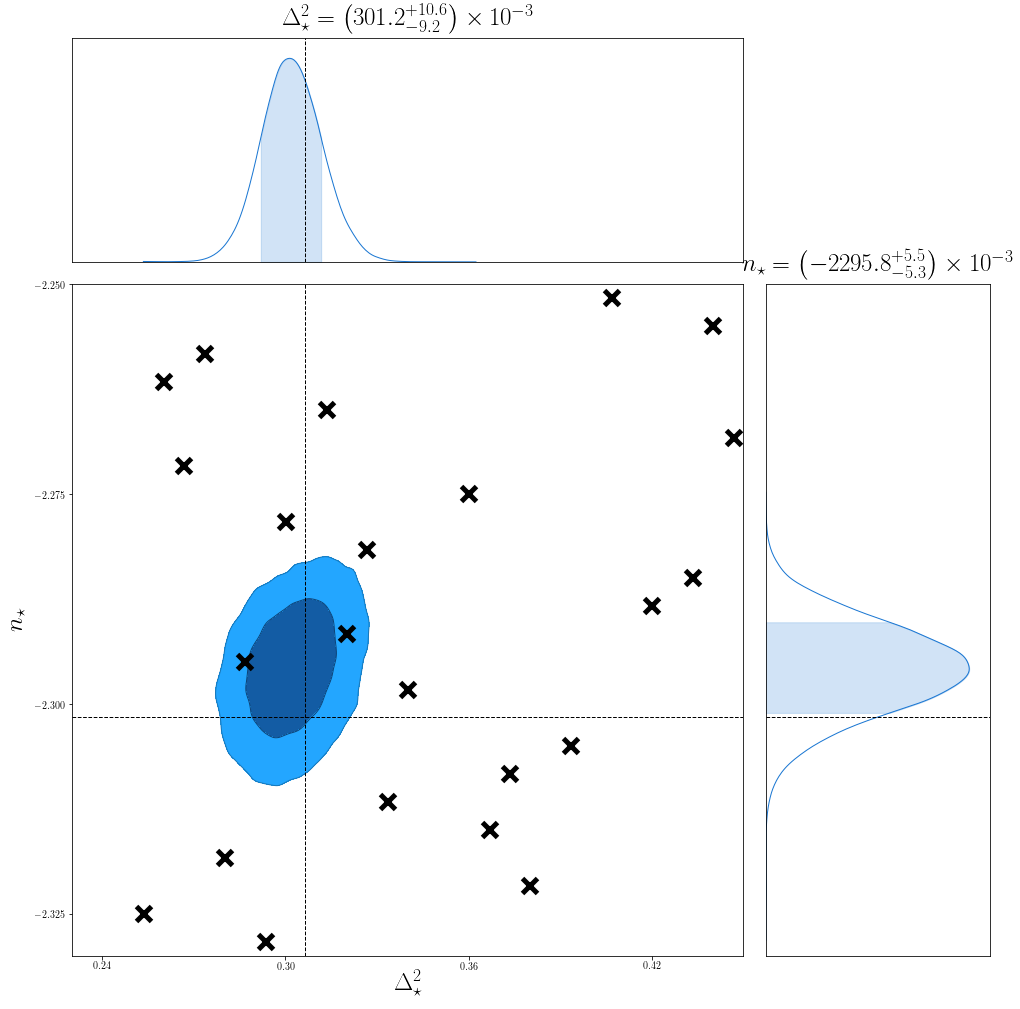

In [11]:
c=ChainConsumer()
c.add_chain(chain_15,parameters=sampler_15.paramstrings)
parameters = sampler_fid.paramstrings
c.configure(diagonal_tick_labels=False, tick_font_size=10, label_font_size=25, max_ticks=4)
fig = c.plotter.plot(figsize=(15,15),parameters=parameters[:2],truth=sampler_15.truth,extents={'$\\Delta^2_\\star$':(0.23,0.45),'$n_\\star$':(-2.33,-2.25)})
#fig.axes[2].plot(theta_alpha_05[0],theta_alpha_05[1],marker="x",color="red",ms=15,mew=5)  ## Refinement sim
for aa in range(len(delta_star_15)):
    fig.axes[2].plot(delta_star_15[aa],n_star_15[aa],marker="x",color="black",ms=15,mew=5)
fig.savefig("prediction2.pdf")
fig.show()

 /usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:445: UserWarning:Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


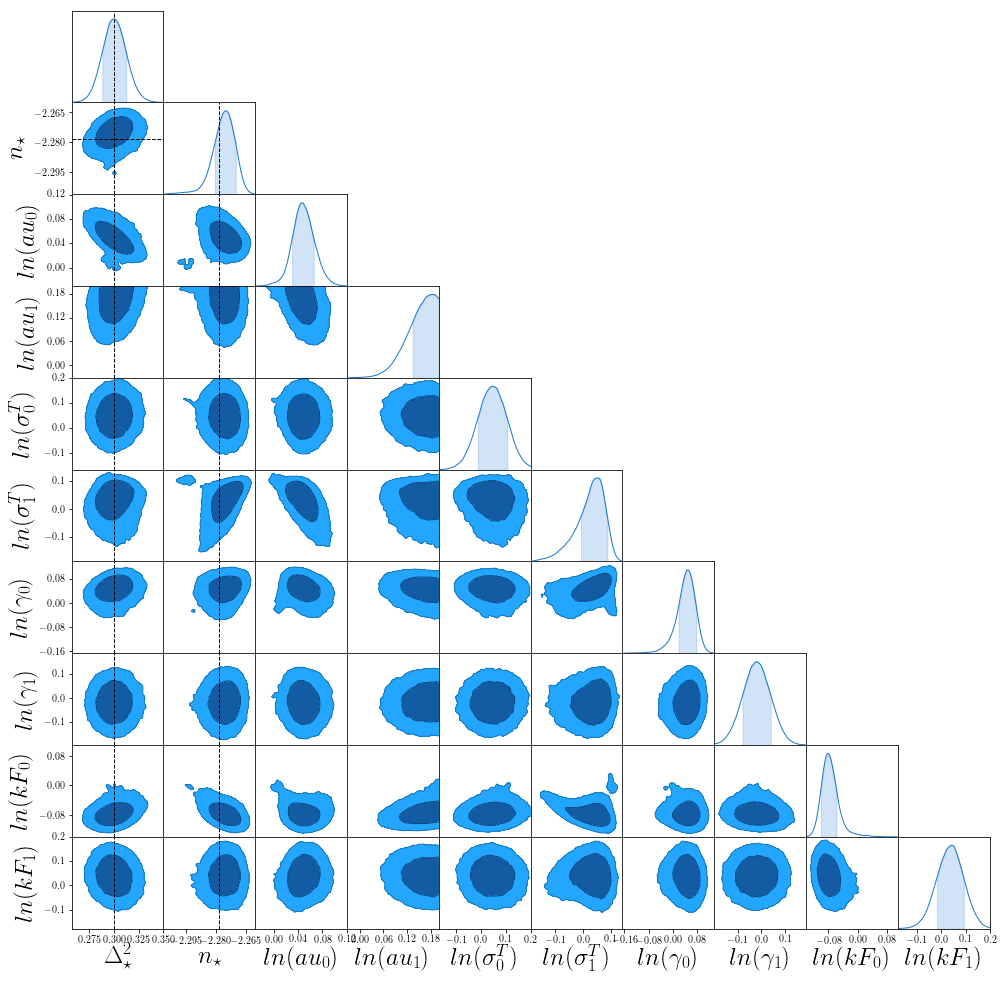

In [12]:
c=ChainConsumer()
c.add_chain(chain_20,parameters=sampler_20.paramstrings,name="Sim 20")
truth={sampler_20.paramstrings[0]:sampler_20.truth[0],sampler_20.paramstrings[1]:sampler_20.truth[1]}
c.configure(diagonal_tick_labels=False, tick_font_size=10, label_font_size=25, max_ticks=4)
fig = c.plotter.plot(figsize=(15,15),truth=truth)
fig.show()

 /usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:445: UserWarning:Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


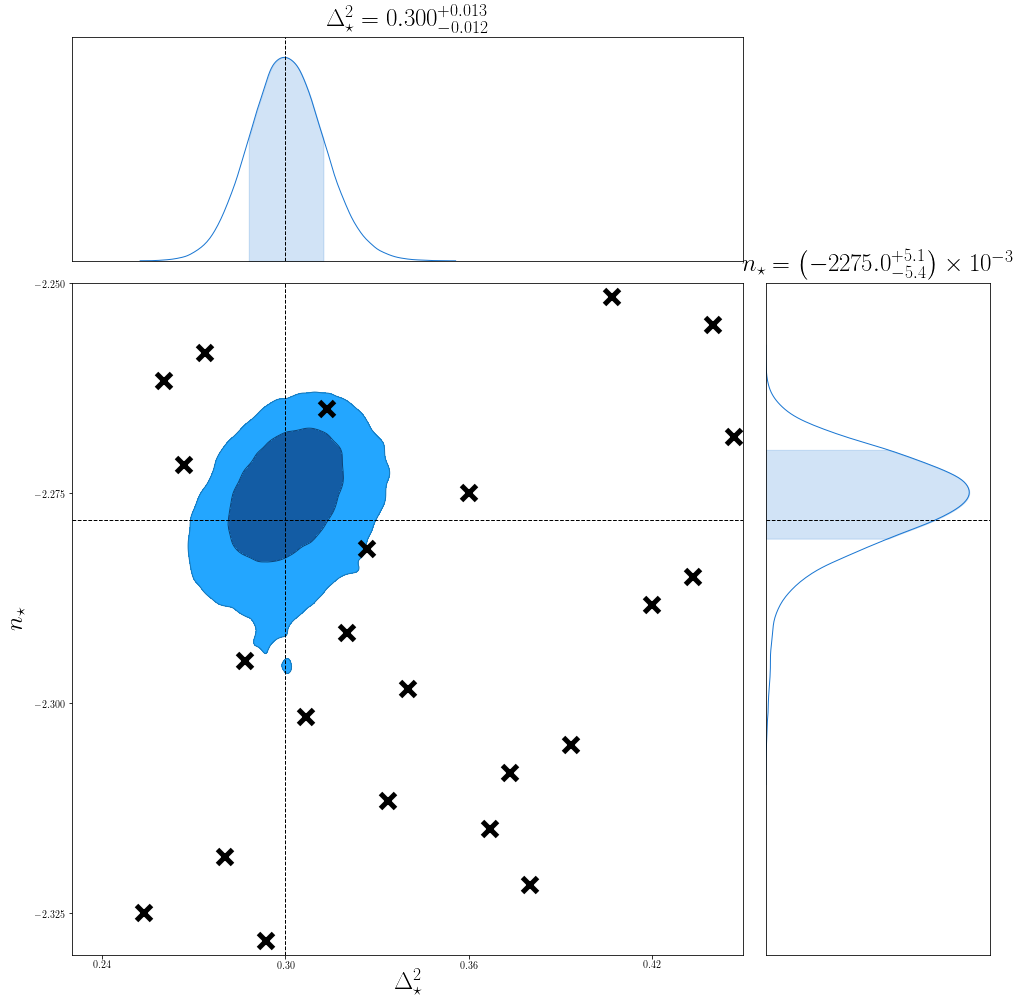

In [13]:
c=ChainConsumer()
c.add_chain(chain_20,parameters=sampler_20.paramstrings)
parameters = sampler_fid.paramstrings
c.configure(diagonal_tick_labels=False, tick_font_size=10, label_font_size=25, max_ticks=4)
fig = c.plotter.plot(figsize=(15,15),parameters=parameters[:2],truth=sampler_20.truth,extents={'$\\Delta^2_\\star$':(0.23,0.45),'$n_\\star$':(-2.33,-2.25)})
#fig.axes[2].plot(theta_alpha_05[0],theta_alpha_05[1],marker="x",color="red",ms=15,mew=5)  ## Refinement sim
for aa in range(len(delta_star_20)):
    fig.axes[2].plot(delta_star_20[aa],n_star_20[aa],marker="x",color="black",ms=15,mew=5)
fig.savefig("prediction3.pdf")
fig.show()

### Undersample simulations - and are we prior dominated?
Take sim 15, rerun the sampler on a training set with 50% of the simulations and compare posteriors. __NB that in these tests we are using different hyperparameters for each emulator. Need to reproduce this test with a standardised set of hyperparameters__

In [14]:
sampler_15_u = emcee_sampler.EmceeSampler(read_chain_file=35)
sampler_15_wide = emcee_sampler.EmceeSampler(read_chain_file=36)

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
 /home/chris/.local/lib/python3.5/site-packages/paramz/parameterized.py:61: RuntimeWarning:Don't forget to initialize by self.initialize_parameter()!


Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Chain shape is  (334500, 10)


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Chain shape is  (429500, 10)


In [15]:
chain_15_u,lnprob_15_u=sampler_15_u.get_chain(cube=False)
chain_15_wide,lnprob_15_wide=sampler_15_wide.get_chain(cube=False)

In [16]:
delta_star_15_u,n_star_15_u=sampler_15_u.like.fit_cosmology_params()

 /usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:445: UserWarning:Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


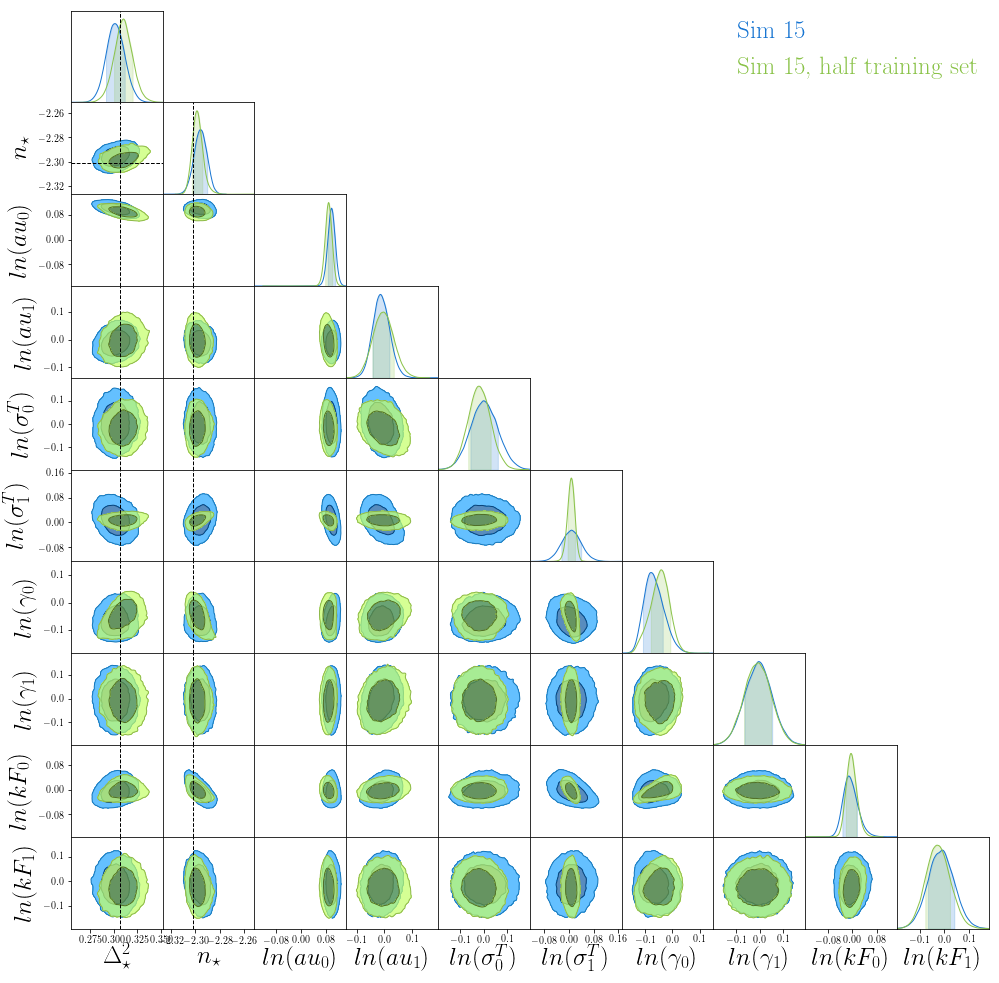

In [17]:
c=ChainConsumer()
c.add_chain(chain_15,parameters=sampler_15.paramstrings,name="Sim 15")
c.add_chain(chain_15_u,parameters=sampler_15_u.paramstrings,name="Sim 15, half training set")
truth={sampler_15.paramstrings[0]:sampler_15.truth[0],sampler_15.paramstrings[1]:sampler_15.truth[1]}
c.configure(diagonal_tick_labels=False, tick_font_size=10, label_font_size=25, max_ticks=4)
fig = c.plotter.plot(figsize=(15,15),truth=truth)
fig.show()

 /usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:445: UserWarning:Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


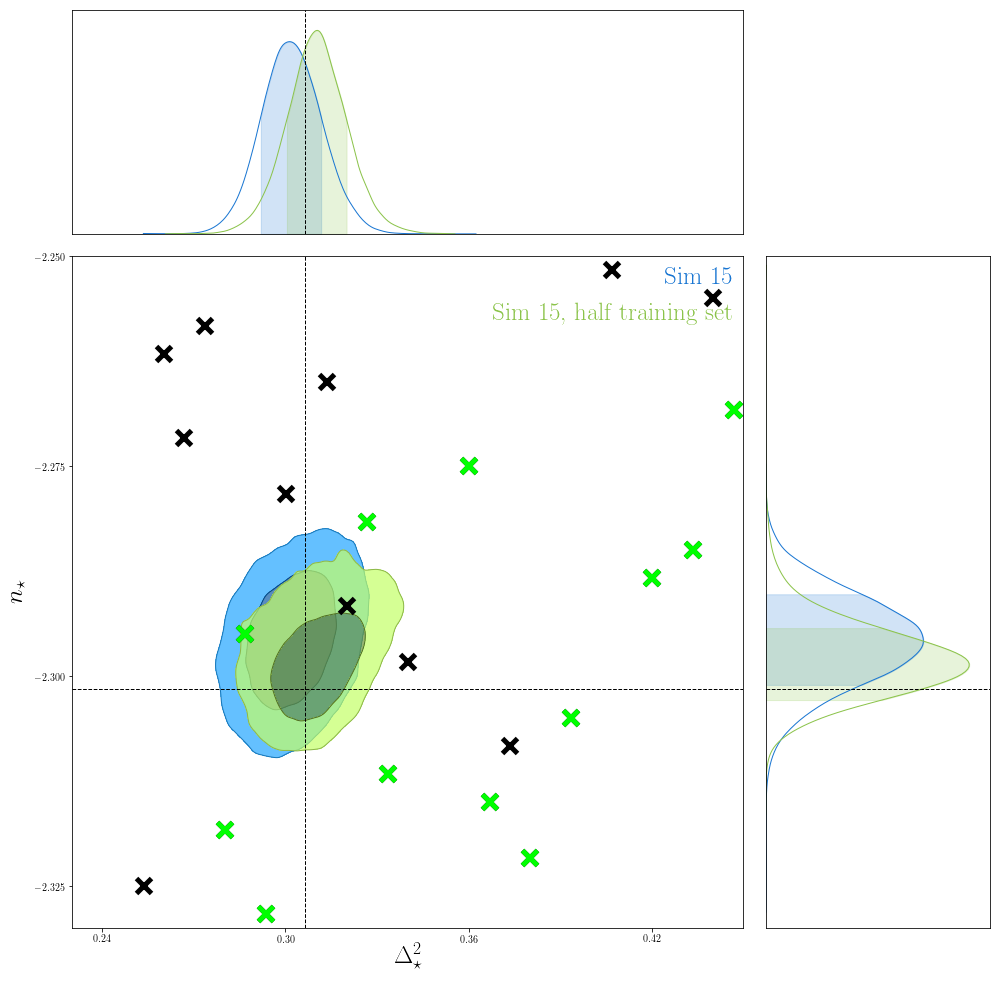

In [18]:
c=ChainConsumer()
c.add_chain(chain_15,parameters=sampler_15.paramstrings,name="Sim 15")
c.add_chain(chain_15_u,parameters=sampler_15_u.paramstrings,name="Sim 15, half training set")
parameters = sampler_fid.paramstrings
c.configure(diagonal_tick_labels=False, tick_font_size=10, label_font_size=25, max_ticks=4)
fig = c.plotter.plot(figsize=(15,15),parameters=parameters[:2],truth=sampler_15.truth,extents={'$\\Delta^2_\\star$':(0.23,0.45),'$n_\\star$':(-2.33,-2.25)})
#fig.axes[2].plot(theta_alpha_05[0],theta_alpha_05[1],marker="x",color="red",ms=15,mew=5)  ## Refinement sim
for aa in range(len(delta_star_15)):
    fig.axes[2].plot(delta_star_15[aa],n_star_15[aa],marker="x",color="black",ms=15,mew=5)
for aa in range(0,len(delta_star_15_u),2):
    fig.axes[2].plot(delta_star_15_u[aa],n_star_15_u[aa],marker="x",color="lime",ms=15,mew=5)
fig.show()

 /usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:445: UserWarning:Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


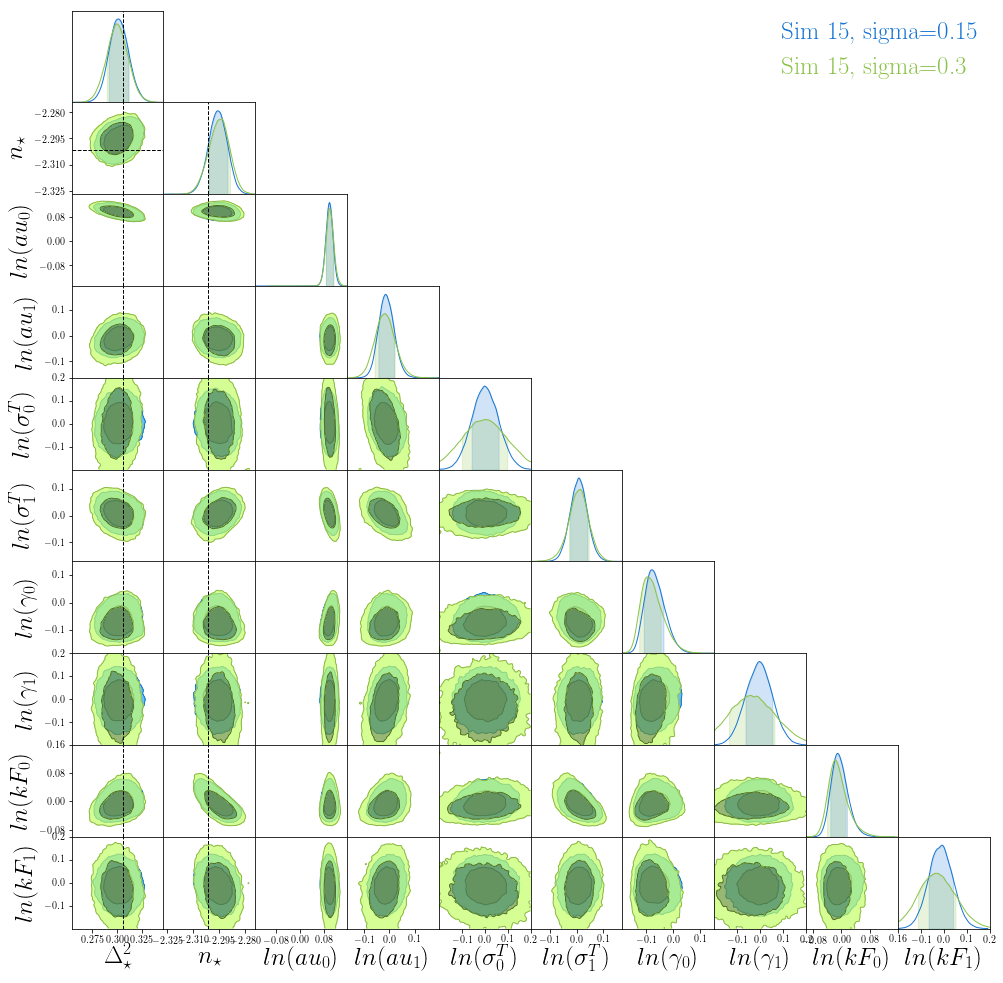

In [19]:
c=ChainConsumer()
c.add_chain(chain_15,parameters=sampler_15.paramstrings,name="Sim 15, sigma=0.15")
c.add_chain(chain_15_wide,parameters=sampler_15_wide.paramstrings,name="Sim 15, sigma=0.3")
truth={sampler_15.paramstrings[0]:sampler_15.truth[0],sampler_15.paramstrings[1]:sampler_15.truth[1]}
c.configure(diagonal_tick_labels=False, tick_font_size=10, label_font_size=25, max_ticks=4)
fig = c.plotter.plot(figsize=(15,15),truth=truth)
fig.show()

In [20]:
## Check a different sim, with uniform priors and Gaussian
sampler_3 = emcee_sampler.EmceeSampler(read_chain_file=38)
sampler_3_uni = emcee_sampler.EmceeSampler(read_chain_file=39)

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
 /home/chris/.local/lib/python3.5/site-packages/paramz/parameterized.py:61: RuntimeWarning:Don't forget to initialize by self.initialize_parameter()!


Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Chain shape is  (532500, 10)


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Chain shape is  (425000, 10)


In [21]:
chain_3,lnprob_3=sampler_3.get_chain(cube=False)

chain_3_uni,lnprob_3_uni=sampler_3_uni.get_chain(cube=False)

 /usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:445: UserWarning:Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


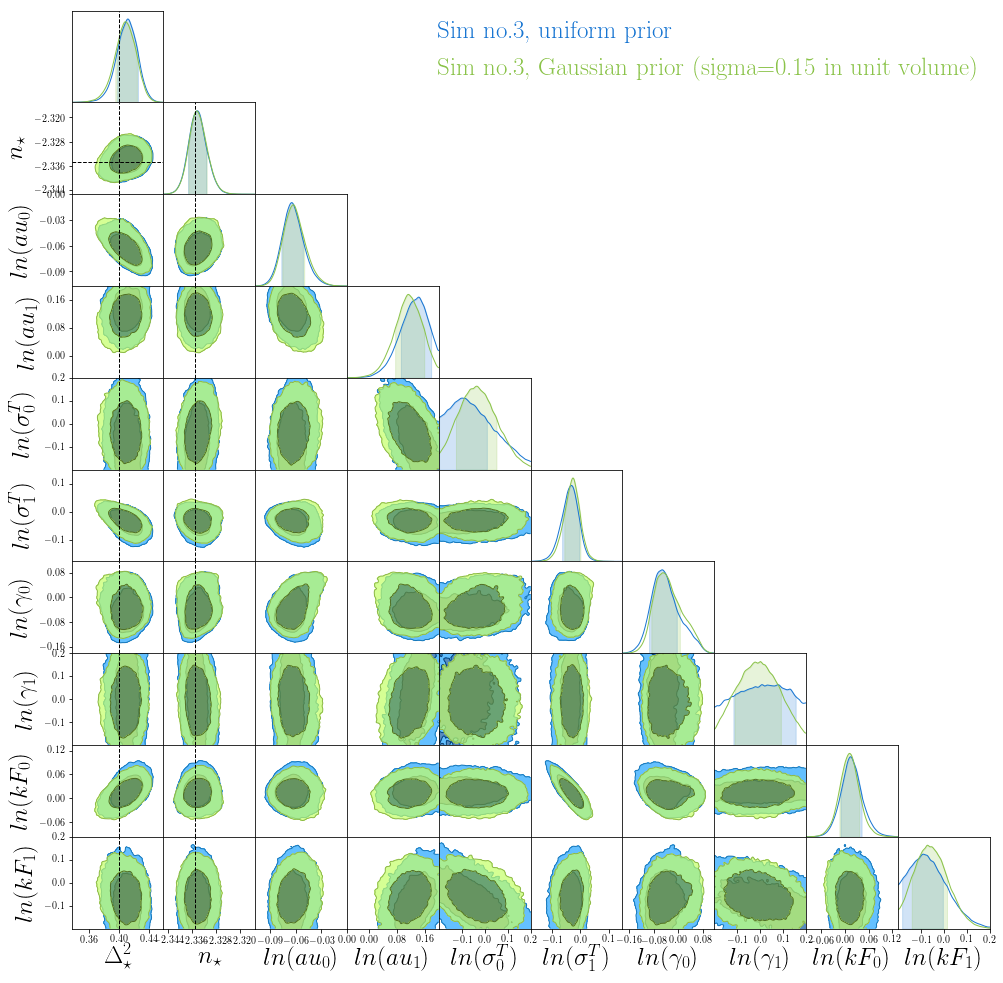

In [22]:
c=ChainConsumer()
c.add_chain(chain_3,parameters=sampler_3.paramstrings,name="Sim no.3, uniform prior")
c.add_chain(chain_3_uni,parameters=sampler_3_uni.paramstrings,name="Sim no.3, Gaussian prior (sigma=0.15 in unit volume)")
truth={sampler_3.paramstrings[0]:sampler_3.truth[0],sampler_3.paramstrings[1]:sampler_3.truth[1]}
c.configure(diagonal_tick_labels=False, tick_font_size=10, label_font_size=25, max_ticks=4)
fig = c.plotter.plot(figsize=(15,15),truth=truth)
fig.savefig("prediction_sim3_full.pdf")
fig.show()

In [23]:
delta_star_3,n_star_3=sampler_3.like.fit_cosmology_params()

 /usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:445: UserWarning:Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


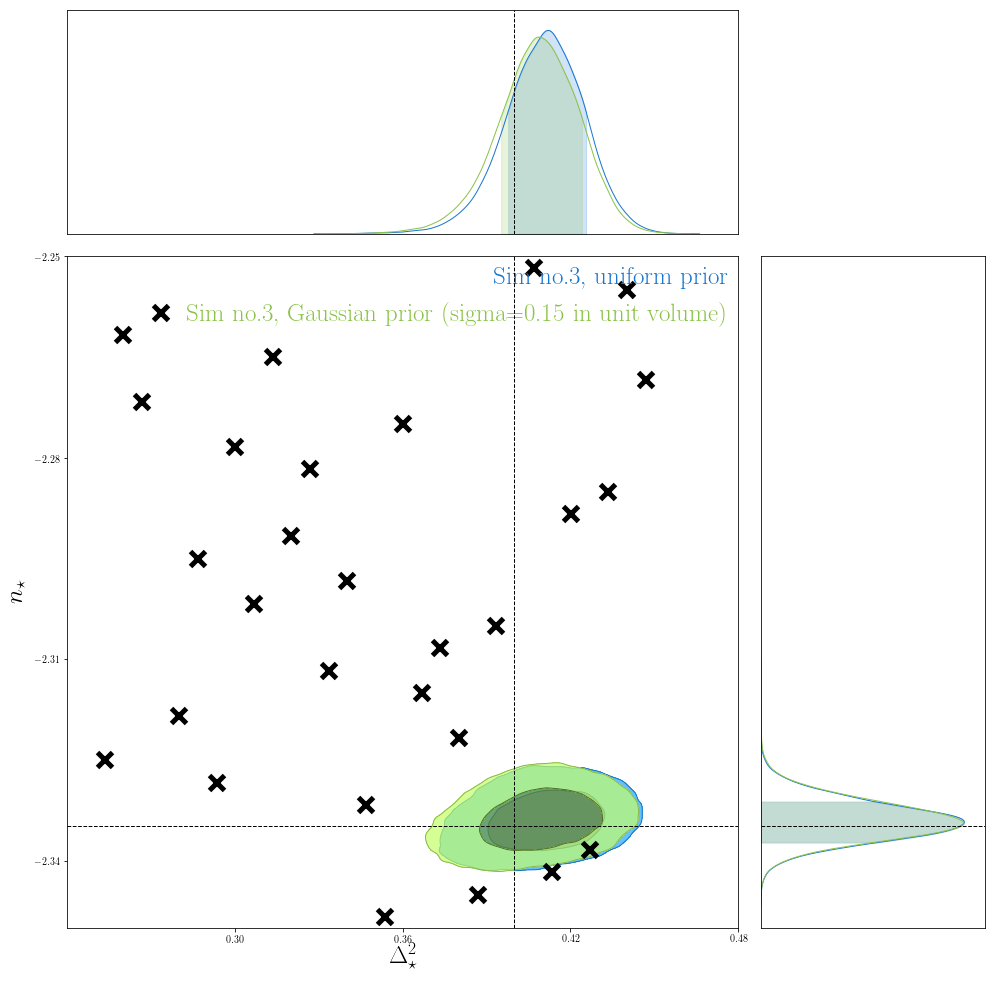

In [24]:
c=ChainConsumer()
c.add_chain(chain_3,parameters=sampler_3.paramstrings,name="Sim no.3, uniform prior")
c.add_chain(chain_3_uni,parameters=sampler_3_uni.paramstrings,name="Sim no.3, Gaussian prior (sigma=0.15 in unit volume)")
parameters = sampler_fid.paramstrings
c.configure(diagonal_tick_labels=False, tick_font_size=10, label_font_size=25, max_ticks=4)
fig = c.plotter.plot(figsize=(15,15),parameters=parameters[:2],truth=sampler_3.truth,extents={'$\\Delta^2_\\star$':(0.24,0.48),'$n_\\star$':(-2.35,-2.25)})
#fig.axes[2].plot(theta_alpha_05[0],theta_alpha_05[1],marker="x",color="red",ms=15,mew=5)  ## Refinement sim
for aa in range(len(delta_star_3)):
    fig.axes[2].plot(delta_star_3[aa],n_star_3[aa],marker="x",color="black",ms=15,mew=5)
fig.savefig("prediction_sim3.pdf")
fig.show()

In [25]:
sampler_3.like.theory.emulator.arxiv.drop_sim_number

3

In [26]:
#sampler_15.like.maximise_acquisition(alpha=1,tolerance=2.,verbose=True)

In [27]:
sampler_3.like.free_parameters.index("Delta2_star")

0

In [30]:
sampler_15.like.free_params[1].value

-2.3015567356815687